# Partioning Around Mediods on Iris Dataset on UCI Repository

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Reading Datasets

In [2]:
data = pd.read_csv('iris.txt', delimiter=',', names = ['sepal length(cm)','sepal width(cm)', 'petal_length(cm)', 'petal_width(cm)', 'target'])
data.head()

,sepal length(cm),sepal width(cm),petal_length(cm),petal_width(cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Manipulation

In [3]:
data['target'] = data['target'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
data.head()

,sepal length(cm),sepal width(cm),petal_length(cm),petal_width(cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
x_data = data.iloc[:, :4]
print(x_data)

     sepal length(cm)  sepal width(cm)  petal_length(cm)  petal_width(cm)
0                 5.1              3.5               1.4              0.2
1                 4.9              3.0               1.4              0.2
2                 4.7              3.2               1.3              0.2
3                 4.6              3.1               1.5              0.2
4                 5.0              3.6               1.4              0.2
..                ...              ...               ...              ...
145               6.7              3.0               5.2              2.3
146               6.3              2.5               5.0              1.9
147               6.5              3.0               5.2              2.0
148               6.2              3.4               5.4              2.3
149               5.9              3.0               5.1              1.8

[150 rows x 4 columns]


In [5]:
y_data = data.iloc[:, 4]
print(y_data)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [6]:
x_data.isnull().sum()

sepal length(cm)    0
sepal width(cm)     0
petal_length(cm)    0
petal_width(cm)     0
dtype: int64

# Data Normalization

In [7]:
scaler = StandardScaler()

In [8]:
x_transformed = pd.DataFrame(scaler.fit_transform(x_data), columns=x_data.columns)
x_transformed.head()

,sepal length(cm),sepal width(cm),petal_length(cm),petal_width(cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Dimensionality Reduction

In [9]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_transformed)
df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df.head()

,principal component 1,principal component 2,principal component 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [10]:
datapoints = df.values
m, f = datapoints.shape
k = 3
print(datapoints)

[[-2.26454173e+00  5.05703903e-01 -1.21943348e-01]
 [-2.08642550e+00 -6.55404729e-01 -2.27250832e-01]
 [-2.36795045e+00 -3.18477311e-01  5.14796236e-02]
 [-2.30419716e+00 -5.75367713e-01  9.88604444e-02]
 [-2.38877749e+00  6.74767397e-01  2.14278490e-02]
 [-2.07053681e+00  1.51854856e+00  3.06842583e-02]
 [-2.44571134e+00  7.45626750e-02  3.42197636e-01]
 [-2.23384186e+00  2.47613932e-01 -8.25744645e-02]
 [-2.34195768e+00 -1.09514636e+00  1.53562399e-01]
 [-2.18867576e+00 -4.48629048e-01 -2.46559522e-01]
 [-2.16348656e+00  1.07059558e+00 -2.64009373e-01]
 [-2.32737775e+00  1.58587455e-01  1.00165616e-01]
 [-2.22408272e+00 -7.09118158e-01 -2.23214514e-01]
 [-2.63971626e+00 -9.38281982e-01  1.89570030e-01]
 [-2.19229151e+00  1.88997851e+00 -4.69480095e-01]
 [-2.25146521e+00  2.72237108e+00  3.26037967e-02]
 [-2.20275048e+00  1.51375028e+00 -1.36349158e-03]
 [-2.19017916e+00  5.14304308e-01 -3.86155949e-02]
 [-1.89407429e+00  1.43111071e+00 -3.70742834e-01]
 [-2.33994907e+00  1.15803343e+

# Data Visualisation

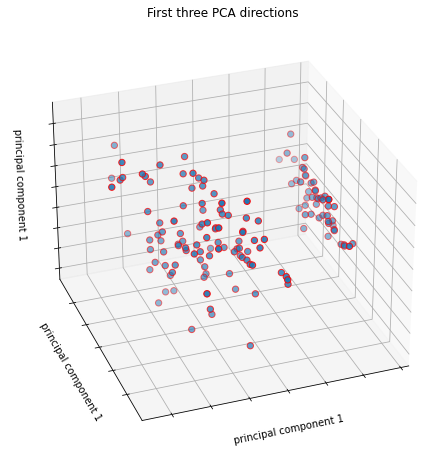

In [11]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], cmap=plt.cm.Set1, edgecolor='r', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

# Algorithm Implementation

In [12]:
def init_mediods(X, k):
    np.random.seed(1)
    samples = np.random.choice(len(X), size=k, replace=False)
    return X[samples, :]

In [13]:
mediods_initial = init_mediods(datapoints, 3)
print(mediods_initial)

[[-2.19229151  1.88997851 -0.46948009]
 [-0.45701287 -1.53946451  0.19612617]
 [ 0.87353699  0.25070861 -0.47214889]]


In [15]:
def comp_distance(X, mediods, p):
    m = len(X)
    mediods_shape = mediods.shape
  
    if len(mediods_shape) == 1:
        mediods = mediods.reshape((1, len(mediods)))
  
    k = len(mediods)

    S = np.empty((m, k))

    for i in range(m):
        d_i = np.linalg.norm(X[i, :]-mediods, ord=p, axis=1)
        S[i, :] = d_i**p

    return S

In [16]:
S = comp_distance(datapoints, mediods_initial, 2)
print(S)

[[ 2.04221808  7.55104262 10.03520454]
 [ 6.54885847  3.6157953   9.64239437]
 [ 5.17953221  5.16341479 11.10540023]
 [ 6.41346585  4.35103305 11.10644807]
 [ 1.75633541  8.66505699 11.06613962]
 [ 0.4029488  11.98227445 10.52782982]
 [ 4.01877701  6.58134222 11.71159711]
 [ 2.84878381  6.42844465  9.8075811 ]
 [ 9.32155243  3.75224721 12.54224615]
 [ 5.51879198  4.38454897  9.9171106 ]
 [ 0.71443634  9.93619081  9.9390487 ]
 [ 3.34045952  6.39085369 10.58188538]
 [ 6.81696092  3.98785753 10.57848361]
 [ 8.6335934   5.1256575  14.19451894]
 [ 0.         15.21530309 12.0865173 ]
 [ 0.94846714 21.41004134 16.12952938]
 [ 0.36079023 12.40872253 11.28045773]
 [ 2.07812819  7.27693545  9.64379046]
 [ 0.30924222 11.21080312  9.0633045 ]
 [ 0.92587132 10.82539054 11.52130242]
 [ 2.21017539  6.37976291  7.80892905]
 [ 1.28133164  9.26487903 10.37328339]
 [ 2.95325024  9.50634848 14.02049133]
 [ 3.5778284   4.59323701  7.5404421 ]
 [ 3.33901483  6.03795401  9.98435082]
 [ 6.3239138   3.3626048 

In [17]:
def assign_labels(S):
    return np.argmin(S, axis=1)

In [18]:
labels = assign_labels(S)
print(labels)

[0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 2 2 1 1 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
def update_mediods(X, mediods, p):
    S = comp_distance(datapoints, mediods, p)
    labels = assign_labels(S)

    out_mediods = mediods

    for i in set(labels):
        avg_dissimilarity = np.sum(comp_distance(datapoints, mediods[i], p))

        cluster_points = datapoints[labels==i]

        for datap in cluster_points:
                new_medoid = datap
                new_dissimilarity= np.sum(comp_distance(datapoints, datap, p))

                if new_dissimilarity < avg_dissimilarity :
                    avg_dissimilarity = new_dissimilarity

                    out_mediods[i] = datap

    return out_mediods

In [21]:
def has_converged(old_mediods, mediods):
      return set([tuple(x) for x in old_mediods]) == set([tuple(x) for x in mediods])

In [22]:
def kmediods(X, k, p, starting_mediods=None, max_steps=np.inf):
    if starting_mediods is None:
        mediods = init_mediods(X, k)
    else:
        mediods = starting_mediods

    converged = False
    labels = np.zeros(len(X))

    i = 1

    while (not converged) and (i<=max_steps):
        old_mediods = mediods.copy()

        S = comp_distance(X, mediods, p)

        labels = assign_labels(S)

        mediods = update_mediods(X, mediods, p)

        converged = has_converged(old_mediods, mediods)
        i+=1

    return (mediods, labels)

# Results

In [23]:
results = kmediods(datapoints, 3, 2)
final_mediods = results[0]
data['clusters'] = results[1]

In [24]:
print(final_mediods)

[[-1.82041156  0.10675079  0.04006147]
 [-0.03725838 -0.4327951   0.19806145]
 [ 0.08905311 -0.17490855  0.13144838]]


In [25]:
print(data['clusters'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: clusters, Length: 150, dtype: int64


# Analysis

- Given two Numpy arrays of {0, 1} labels, returns a new boolean array indicating at which locations the input arrays have the same label (i.e., the corresponding entry is True). This function can consider "inexact" matches. That is, if `exact` is False, then the function will assume the {0, 1} labels may be regarded as the same up to a swapping of the labels. This feature allows
    a = [0, 0, 1, 1, 0, 1, 1]
    b = [1, 1, 0, 0, 1, 0, 0]
    to be regarded as equal. (That is, use `exact=False` when you only care about "relative" labeling.)

In [26]:
def mark_matches(a, b, exact=False):
    
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False # Invert

In [27]:
def count_matches(a, b, exact=False):
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

In [28]:
n_matches = count_matches(labels, data['clusters'])
print(n_matches, "matches out of",len(data), "data points", "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

130 matches out of 150 data points (~ 86.7%)


In [29]:
Comparison = pd.DataFrame({'Actual':y_data,'Predicted':results[1]})
Comparison

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2
